<a href="https://colab.research.google.com/github/saranga0427/DataScience-Projects/blob/Learning-DS/CustomerSegmentationFlights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('flight_test.csv')

In [ ]:
data.shape

(7988, 23)

In [ ]:
data.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,27355,9/19/2011,6/2/2012,Male,4,nanjing,jiangsu,CN,29.0,3/31/2014,...,0.0,2005,9/30/2012,549,120.0,120,0,1.000000,2879,6
1,4032,9/18/2012,9/18/2012,Female,4,changchunshi,jilinsheng,CN,43.0,3/31/2014,...,984.0,2301,2/4/2014,57,252.0,477,0,0.871291,1731,0
2,12913,3/18/2009,3/18/2009,Male,4,beijing,beijing,CN,31.0,3/31/2014,...,0.0,2397,3/13/2013,385,115.5,167,0,0.836358,1626,0
3,58465,9/6/2012,10/3/2012,Male,4,shantou,guangdong,CN,30.0,3/31/2014,...,485.0,2852,6/18/2013,288,86.0,174,0,0.702924,1786,0
4,45414,6/13/2012,9/6/2012,Male,4,guangzhou,guangdong,CN,40.0,3/31/2014,...,442.0,3777,2/25/2014,36,268.5,536,0,0.530725,3639,22


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7988 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          7988 non-null   int64  
 1   FFP_DATE           7988 non-null   object 
 2   FIRST_FLIGHT_DATE  7988 non-null   object 
 3   GENDER             7988 non-null   object 
 4   FFP_TIER           7988 non-null   int64  
 5   WORK_CITY          7685 non-null   object 
 6   WORK_PROVINCE      7524 non-null   object 
 7   WORK_COUNTRY       7982 non-null   object 
 8   AGE                7910 non-null   float64
 9   LOAD_TIME          7988 non-null   object 
 10  FLIGHT_COUNT       7988 non-null   int64  
 11  BP_SUM             7988 non-null   int64  
 12  SUM_YR_1           7699 non-null   float64
 13  SUM_YR_2           7913 non-null   float64
 14  SEG_KM_SUM         7988 non-null   int64  
 15  LAST_FLIGHT_DATE   7988 non-null   object 
 16  LAST_TO_END        7988 

In [ ]:
data.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,7988.000000,7988.000000,7910.000000,7988.000000,7988.000000,7699.000000,7913.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000
mean,31114.380696,4.008763,40.890898,2.378192,1028.221582,753.949474,594.095286,2438.785303,317.452929,100.593881,123.566224,0.030921,0.616935,1828.828117,2.047071
std,18222.504374,0.121232,10.297563,0.750483,514.824691,740.429594,657.696886,990.760396,211.237247,132.284864,152.106381,0.365907,0.205400,11573.723888,6.091004
min,7.000000,4.000000,9.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15411.750000,4.000000,33.000000,2.000000,692.000000,0.000000,0.000000,1744.000000,130.000000,5.000000,5.000000,0.000000,0.450000,763.000000,0.000000
50%,31011.500000,4.000000,39.000000,2.000000,1012.000000,690.000000,462.000000,2293.500000,299.000000,46.000000,58.000000,0.000000,0.601520,1152.500000,0.000000
75%,46711.500000,4.000000,47.000000,3.000000,1386.000000,1280.000000,1095.000000,2930.000000,497.000000,148.000000,194.000000,0.000000,0.767436,1596.000000,0.000000
max,62887.000000,6.000000,92.000000,10.000000,4000.000000,7100.000000,5460.000000,8016.000000,731.000000,728.000000,728.000000,22.000000,1.500000,985572.000000,92.000000


In [ ]:
data.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY            303
WORK_PROVINCE        464
WORK_COUNTRY           6
AGE                   78
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             289
SUM_YR_2              75
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [ ]:
data.isnull()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7984,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7985,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data['WORK_CITY'].notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
7983    True
7984    True
7985    True
7986    True
7987    True
Name: WORK_CITY, Length: 7988, dtype: bool

In [ ]:
data= data[data['WORK_CITY'].notnull() & data['WORK_PROVINCE'].notnull()]

In [ ]:
data.shape

(7476, 23)

In [ ]:
data.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                   55
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             279
SUM_YR_2              74
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [ ]:
data.notnull().sum()

MEMBER_NO            7476
FFP_DATE             7476
FIRST_FLIGHT_DATE    7476
GENDER               7476
FFP_TIER             7476
WORK_CITY            7476
WORK_PROVINCE        7476
WORK_COUNTRY         7476
AGE                  7421
LOAD_TIME            7476
FLIGHT_COUNT         7476
BP_SUM               7476
SUM_YR_1             7197
SUM_YR_2             7402
SEG_KM_SUM           7476
LAST_FLIGHT_DATE     7476
LAST_TO_END          7476
AVG_INTERVAL         7476
MAX_INTERVAL         7476
EXCHANGE_COUNT       7476
avg_discount         7476
Points_Sum           7476
Point_NotFlight      7476
dtype: int64

In [ ]:
data['AGE']= data['AGE'].fillna(data['AGE'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             279
SUM_YR_2              74
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [ ]:
#interpolate
data['SUM_YR_1'].interpolate(method = 'linear', inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data[data['SUM_YR_1'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [ ]:
data.isnull().sum()

MEMBER_NO             0
FFP_DATE              0
FIRST_FLIGHT_DATE     0
GENDER                0
FFP_TIER              0
WORK_CITY             0
WORK_PROVINCE         0
WORK_COUNTRY          0
AGE                   0
LOAD_TIME             0
FLIGHT_COUNT          0
BP_SUM                0
SUM_YR_1              0
SUM_YR_2             74
SEG_KM_SUM            0
LAST_FLIGHT_DATE      0
LAST_TO_END           0
AVG_INTERVAL          0
MAX_INTERVAL          0
EXCHANGE_COUNT        0
avg_discount          0
Points_Sum            0
Point_NotFlight       0
dtype: int64

In [ ]:
data['SUM_YR_2'].interpolate(method = 'linear', inplace= True)

In [ ]:
data.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
data.nunique()

MEMBER_NO            7476
FFP_DATE             2324
FIRST_FLIGHT_DATE    2465
GENDER                  2
FFP_TIER                3
WORK_CITY             782
WORK_PROVINCE         276
WORK_COUNTRY           40
AGE                    70
LOAD_TIME               1
FLIGHT_COUNT            9
BP_SUM               1441
SUM_YR_1             1485
SUM_YR_2             1538
SEG_KM_SUM           2312
LAST_FLIGHT_DATE      730
LAST_TO_END           730
AVG_INTERVAL         1111
MAX_INTERVAL          627
EXCHANGE_COUNT          8
avg_discount         4143
Points_Sum           2219
Point_NotFlight        46
dtype: int64

In [ ]:
data.dtypes
#have to take care of object dtypes as not all will be useful for us.

MEMBER_NO              int64
FFP_DATE              object
FIRST_FLIGHT_DATE     object
GENDER                object
FFP_TIER               int64
WORK_CITY             object
WORK_PROVINCE         object
WORK_COUNTRY          object
AGE                  float64
LOAD_TIME             object
FLIGHT_COUNT           int64
BP_SUM                 int64
SUM_YR_1             float64
SUM_YR_2             float64
SEG_KM_SUM             int64
LAST_FLIGHT_DATE      object
LAST_TO_END            int64
AVG_INTERVAL         float64
MAX_INTERVAL           int64
EXCHANGE_COUNT         int64
avg_discount         float64
Points_Sum             int64
Point_NotFlight        int64
dtype: object

In [ ]:
data['AGE'].unique()

array([29., 43., 31., 30., 40., 33., 34., 45., 35., 46., 23., 57., 53.,
       37., 44., 48., 41., 39., 63., 47., 38., 36., 25., 52., 54., 28.,
       56., 49., 42., 24., 32., 76., 58., 59., 62., 51., 55., 65., 61.,
       67., 69., 27., 26., 50., 64., 21., 22., 73., 78., 60., 70., 66.,
       75., 68., 74., 71., 72., 16., 17., 79., 19., 77., 18., 84., 13.,
       91., 20., 83.,  9., 92.])

In [ ]:
data['WORK_CITY'].nunique()

782

In [ ]:
data['WORK_PROVINCE'].nunique()

276

In [ ]:
data['WORK_COUNTRY'].nunique()

40

In [ ]:
country_members = data[['WORK_COUNTRY', 'MEMBER_NO']]
country_members

,WORK_COUNTRY,MEMBER_NO
0,CN,27355
1,CN,4032
2,CN,12913
3,CN,58465
4,CN,45414
...,...,...
7983,CN,18375
7984,CN,36041
7985,CN,45690
7986,CN,61027


In [ ]:
country_members.groupby(['WORK_COUNTRY'])['MEMBER_NO'].count().sort_values(ascending= False)

WORK_COUNTRY
CN    7083
KR     157
US      44
HK      40
JP      34
TW      15
CA      14
SG      11
AU      10
MY      10
中        8
DE       6
PH       5
GB       4
LA       2
TR       2
SA       2
NL       2
NI       2
DK       2
NG       2
ID       2
ES       2
KA       1
TH       1
cn       1
ZA       1
VN       1
UY       1
BE       1
BG       1
BR       1
CL       1
FR       1
CR       1
IA       1
IT       1
CH       1
AT       1
AR       1
Name: MEMBER_NO, dtype: int64

In [ ]:
#40 work countries converted into one hot encoding will make the data huge. 
#adding 4o more features is adding 40 more dimensions and most of the dimensions are sparse
#hence we are selecting only a few contries with more members
data = data[data.WORK_COUNTRY.isin(['CN', 'KR', 'US', 'HK', 'JP'])]
#data will only have those records with members from above contries

In [ ]:
data.WORK_COUNTRY.unique()

array(['CN', 'HK', 'KR', 'US', 'JP'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7358 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          7358 non-null   int64  
 1   FFP_DATE           7358 non-null   object 
 2   FIRST_FLIGHT_DATE  7358 non-null   object 
 3   GENDER             7358 non-null   object 
 4   FFP_TIER           7358 non-null   int64  
 5   WORK_CITY          7358 non-null   object 
 6   WORK_PROVINCE      7358 non-null   object 
 7   WORK_COUNTRY       7358 non-null   object 
 8   AGE                7358 non-null   float64
 9   LOAD_TIME          7358 non-null   object 
 10  FLIGHT_COUNT       7358 non-null   int64  
 11  BP_SUM             7358 non-null   int64  
 12  SUM_YR_1           7358 non-null   float64
 13  SUM_YR_2           7358 non-null   float64
 14  SEG_KM_SUM         7358 non-null   int64  
 15  LAST_FLIGHT_DATE   7358 non-null   object 
 16  LAST_TO_END        7358 

In [ ]:
#dropping irrelevant features. 
# 700 city and 200 provines, they are very detailes, we just need high level pattern so dropping those
data.drop(columns =['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE', 'LOAD_TIME', 'WORK_CITY', 'WORK_PROVINCE'], axis =1, inplace= True)

In [ ]:
data.dtypes

GENDER              object
FFP_TIER             int64
WORK_COUNTRY        object
AGE                float64
FLIGHT_COUNT         int64
BP_SUM               int64
SUM_YR_1           float64
SUM_YR_2           float64
SEG_KM_SUM           int64
LAST_TO_END          int64
AVG_INTERVAL       float64
MAX_INTERVAL         int64
EXCHANGE_COUNT       int64
avg_discount       float64
Points_Sum           int64
Point_NotFlight      int64
dtype: object

In [ ]:
data.isnull().sum()

GENDER             0
FFP_TIER           0
WORK_COUNTRY       0
AGE                0
FLIGHT_COUNT       0
BP_SUM             0
SUM_YR_1           0
SUM_YR_2           0
SEG_KM_SUM         0
LAST_TO_END        0
AVG_INTERVAL       0
MAX_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64

In [ ]:
#Encoding


In [ ]:
#pd.get_dummies- can be used to analyze data cannot keep using it like OHE as we do not create an object of it
#can't do the same transformation on test data in dummies
data= pd.get_dummies(data, columns= ['WORK_COUNTRY'])

In [ ]:
data.shape

(7358, 20)

In [ ]:
data.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,WORK_COUNTRY_CN,WORK_COUNTRY_HK,WORK_COUNTRY_JP,WORK_COUNTRY_KR,WORK_COUNTRY_US
0,Male,4,29.0,2,1677,1830.0,0.0,2005,549,120.0,120,0,1.000000,2879,6,1,0,0,0,0
1,Female,4,43.0,3,1731,960.0,984.0,2301,57,252.0,477,0,0.871291,1731,0,1,0,0,0,0
2,Male,4,31.0,3,1626,1992.0,0.0,2397,385,115.5,167,0,0.836358,1626,0,1,0,0,0,0
3,Male,4,30.0,4,1786,2013.0,485.0,2852,288,86.0,174,0,0.702924,1786,0,1,0,0,0,0
4,Male,4,40.0,3,1646,1555.0,442.0,3777,36,268.5,536,0,0.530725,3639,22,1,0,0,0,0


In [ ]:
data.dtypes

GENDER              object
FFP_TIER             int64
AGE                float64
FLIGHT_COUNT         int64
BP_SUM               int64
SUM_YR_1           float64
SUM_YR_2           float64
SEG_KM_SUM           int64
LAST_TO_END          int64
AVG_INTERVAL       float64
MAX_INTERVAL         int64
EXCHANGE_COUNT       int64
avg_discount       float64
Points_Sum           int64
Point_NotFlight      int64
WORK_COUNTRY_CN      uint8
WORK_COUNTRY_HK      uint8
WORK_COUNTRY_JP      uint8
WORK_COUNTRY_KR      uint8
WORK_COUNTRY_US      uint8
dtype: object

In [ ]:
data = pd.get_dummies(data, columns =['GENDER'])

In [ ]:
data.dtypes

FFP_TIER             int64
AGE                float64
FLIGHT_COUNT         int64
BP_SUM               int64
SUM_YR_1           float64
SUM_YR_2           float64
SEG_KM_SUM           int64
LAST_TO_END          int64
AVG_INTERVAL       float64
MAX_INTERVAL         int64
EXCHANGE_COUNT       int64
avg_discount       float64
Points_Sum           int64
Point_NotFlight      int64
WORK_COUNTRY_CN      uint8
WORK_COUNTRY_HK      uint8
WORK_COUNTRY_JP      uint8
WORK_COUNTRY_KR      uint8
WORK_COUNTRY_US      uint8
GENDER_Female        uint8
GENDER_Male          uint8
dtype: object

In [ ]:
data.shape

(7358, 21)

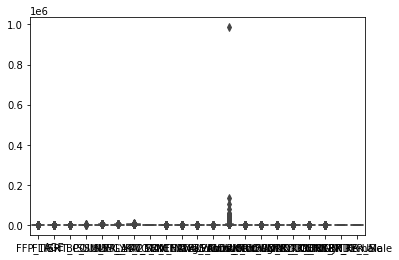

In [ ]:
#scaling
import seaborn as sns
sns.boxplot(data=data)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()

In [ ]:
SC.fit_transform(data)

array([[-0.07457281, -1.13815981, -0.50607024, ..., -0.07756198,
        -0.65372172,  0.65372172],
       [-0.07457281,  0.25432123,  0.83579095, ..., -0.07756198,
         1.52970289, -1.52970289],
       [-0.07457281, -0.93923394,  0.83579095, ..., -0.07756198,
        -0.65372172,  0.65372172],
       ...,
       [-0.07457281,  0.25432123, -0.50607024, ..., -0.07756198,
         1.52970289, -1.52970289],
       [-0.07457281, -0.44191929, -0.50607024, ..., -0.07756198,
         1.52970289, -1.52970289],
       [-0.07457281, -1.13815981, -0.50607024, ..., -0.07756198,
         1.52970289, -1.52970289]])

In [ ]:
#modeling
from sklearn.cluster import KMeans
km= KMeans()

In [ ]:
y_km= km.fit_predict(data)

In [ ]:
y_km[0:20]

array([4, 7, 4, 4, 5, 4, 7, 0, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
      dtype=int32)

In [ ]:
objs= []
for k in range(1, 11):
  km= KMeans(n_clusters= k)
  km.fit(data)
  objs.append(km.inertia_)

In [ ]:
objs

[1084674120446.0359,
 116860706391.48595,
 63325977852.27078,
 41718646478.56972,
 30069326752.14705,
 25575759562.966183,
 21267805772.60218,
 18101158980.4279,
 15936780436.92554,
 13951270894.772905]

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'objs')

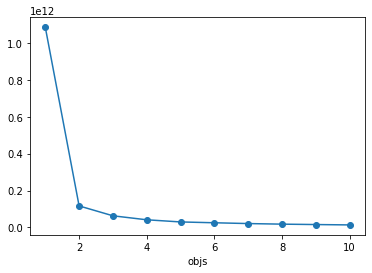

In [ ]:
plt.plot(range(1,11),objs,marker= 'o' )
plt.xlabel('k')
plt.xlabel('objs')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(data, y_km)

0.26236579233231083